In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from Constants import *

In [2]:
df = pd.read_csv(DATASET_FILE)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

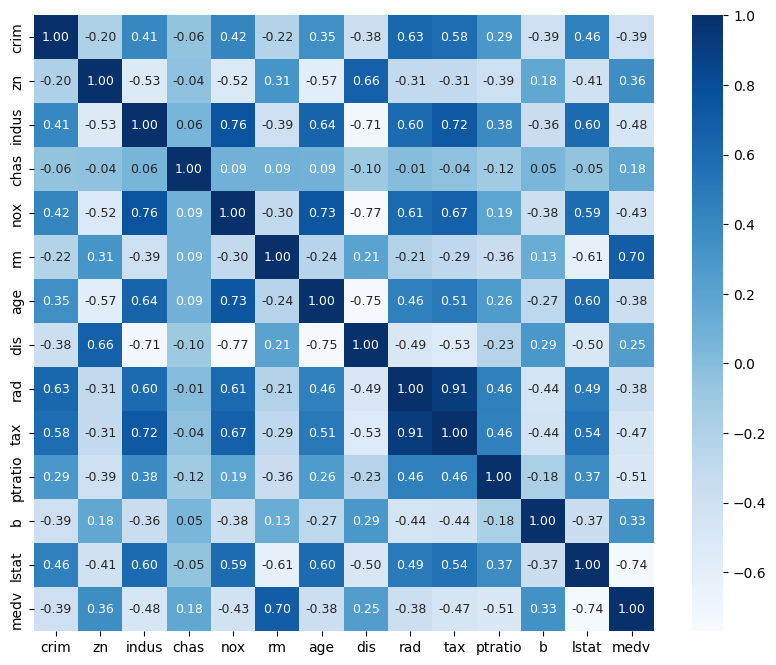

In [7]:
corrmat = df.corr()
plt.figure(figsize=(10, 8))

hm = sns.heatmap(corrmat,
                 annot=True,
                 fmt=".2f",
                 annot_kws={'size': 9},
                 cmap="Blues")

In [8]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]
y = np.round(y)

In [9]:
suitable_features = SelectKBest(score_func = chi2, k = 5)
result = suitable_features.fit(X, y)

In [10]:
scores = pd.DataFrame(result.scores_)
columns = pd.DataFrame(X.columns)
columns_scores = pd.concat([columns, scores], axis = 1)
columns_scores.columns = ['Feature', 'Score']
#print()

In [11]:
datframe = columns_scores.nlargest(K_FEATURES, "Score")
print(datframe)

   Feature         Score
9      tax  14817.836927
1       zn   5937.859414
0     crim   5503.817133
11       b   3340.486412
6      age   2424.308937


In [12]:
model = ExtraTreesClassifier()
model.fit(X, y)
key_datframe = pd.Series(model.feature_importances_, index = X.columns).nlargest(K_FEATURES)
print(key_datframe)

rm       0.140986
lstat    0.135620
age      0.121667
crim     0.113859
dis      0.109441
dtype: float64


In [13]:
X = df.iloc[:, [5, -1, 9, 1, 11]]
y = df.iloc[:, 13]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = VALID_SET_SIZE
                                                    , random_state = 42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Training Accuracy: ", model.score(X_train, y_train) * 100)
print("Testing Accuracy: ", model.score(X_test, y_test) * 100)
print("Model Accuracy: ", r2_score(y, model.predict(X)) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test, preds))

Training Accuracy:  99.99553265042711
Testing Accuracy:  99.98284897905013
Model Accuracy:  99.99291415613037
Mean Absolute Error:  0.06123622047244374


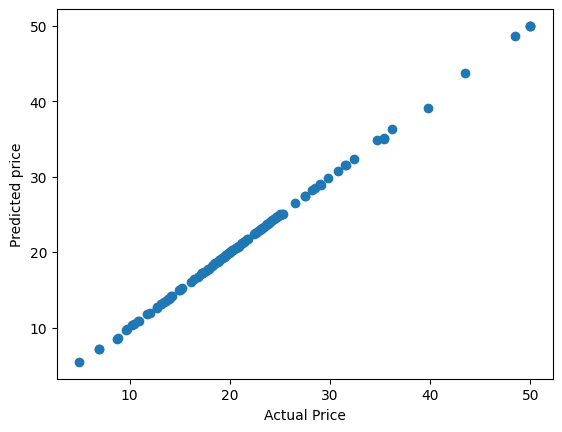

In [15]:
plt.scatter(y_test, preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.show()